In [1]:
from fredapi import Fred
import matplotlib.pyplot as plt
import pandas as pd
import os

In [46]:
pd.options.display.max_rows=50
pd.options.display.max_columns=100

In [14]:
with open (os.environ.get('FRED_API_KEY')) as file:
    fred_api_key = file.read()

fred_data = Fred(api_key=fred_api_key)

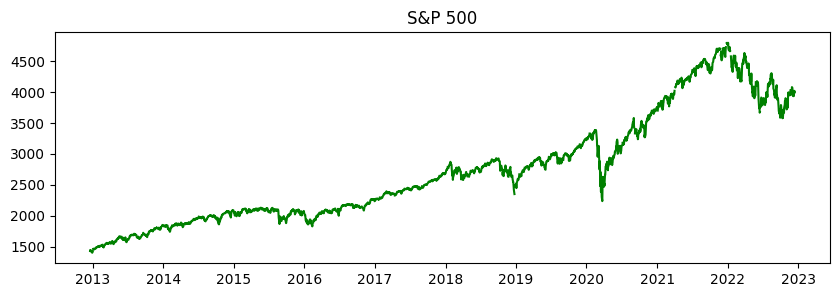

In [30]:
#Plotting S&P 500 DATA
data = fred_data.get_series('SP500')

plt.figure(figsize=(10,3))
plt.plot(data,'g')
plt.title('S&P 500')
plt.show()

#### Answering the following questions.
##### 1.What economic indicators are suggestive of economic growth?
##### 2.In what ways do financial crises impact the lives of ordinary people?
##### 3.How to define economic welfare?
##### 4.To what extent can the government / Central Bank influence the macro-economy? 

###### 1.What economic indicators are suggestive of economic growth?
###### Here, i will be investigating the factors that are more suggestive of the economic growth or factors that affect the growth. The economic measure would be the GDP Growth rate.


In [330]:
def growth_rate(value,df):
    
    global initial_value
    if df[0] == value:
        initial_value = value
        return 0
    
    else:
        rate = f'{((value - initial_value) /initial_value) :.2f}'
        initial_value = value
        return float(rate) * 100

In [332]:
def series_to_dataframe(series_object, column_name):

    df = series_object.to_frame(name=column_name)
    df.reset_index(inplace=True)
    df.rename(columns={'index':'date'},inplace=True)

    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year 
    
    new_df= df.loc[df['month']==10].copy()
    new_df = new_df.loc[df['year']>=1948].copy()
    new_df.reset_index(drop=True,inplace=True)
    new_df.drop(['date','month'],axis=1,inplace=True)

    return new_df

In [370]:
def plot_many(number,*plots,labels,colors,title=None):

    plt.figure(figsize=(10,3))
    for plotno in range(number):
        X=plots[0][plotno][0]
        Y=plots[0][plotno][1]
        
        plt.plot(X,Y,colors[plotno],label=labels[plotno])
    
    if title:
        plt.title(title)
    plt.legend(loc='upper left')
    plt.show()    

In [397]:
#retrieving the GDP figures

gdp = fred_data.get_series('GDPC1') #quarterly data
gdp.dropna(axis=0,inplace=True)
gdp_df = gdp.to_frame(name='gdp')
gdp_df['quarter'] = gdp_df.index
gdp_df.index = [index for index in  range(len(gdp_df))]

In [398]:
gdp_df['gdp_growth'] = gdp_df['gdp'].apply(growth_rate, df=gdp_df['gdp'])
gdp_df['quarter'] = pd.to_datetime(gdp_df['quarter'])
gdp_df['month'] = gdp_df['quarter'].dt.month

#gdp growth rate per year
gdp_year_df=gdp_df.loc[gdp_df['month']==10].copy()
gdp_year_df['year'] = gdp_year_df['quarter'].dt.year
gdp_year_df.reset_index(drop=True, inplace=True)
gdp_year_df.drop('month',axis=1,inplace=True)
gdp_year_df.drop('quarter',axis=1,inplace=True)

In [399]:
gdp_year_df['gdp_growth'] = gdp_year_df['gdp'].apply(growth_rate,df=gdp_year_df['gdp'])

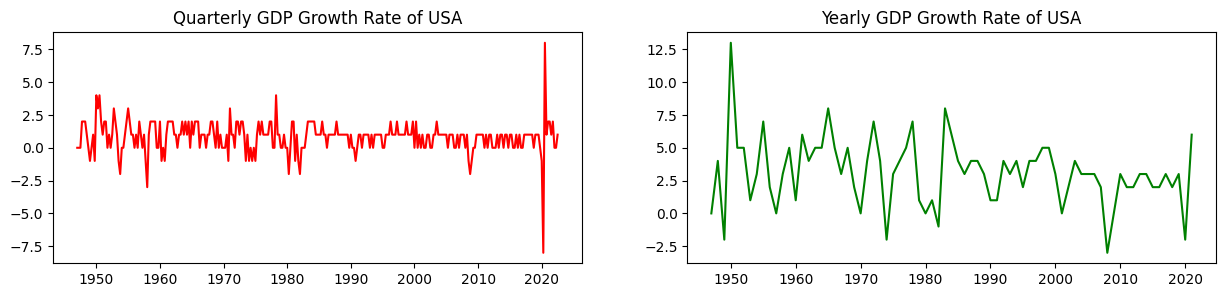

In [402]:
#plotting gdp_growth_rate

plt.figure(figsize=(15,3))
plt.subplot(121)
plt.plot(gdp_df['quarter'],gdp_df['gdp_growth'],'r')
plt.title('Quarterly GDP Growth Rate of USA')

plt.subplot(122)
plt.plot(gdp_year_df['year'],gdp_year_df['gdp_growth'],'g')
plt.title('Yearly GDP Growth Rate of USA')
plt.show()


In [320]:
##Unemployment figures

unef = fred_data.get_series('UNRATE')
unef_df = series_to_dataframe(unef,column_name='rate')

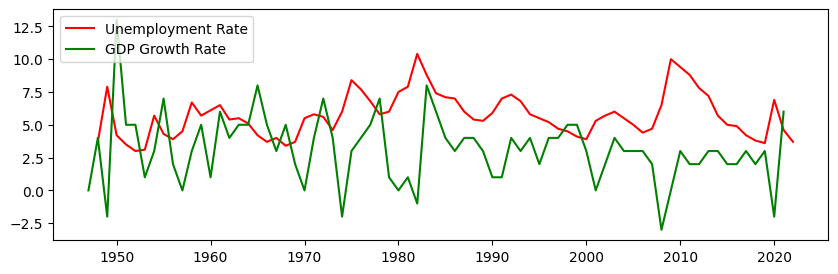

In [403]:
plt.figure(figsize=(10,3))
plt.plot(unef_df['year'],unef_df['rate'],'r',label='Unemployment Rate')
plt.plot(gdp_year_df['year'],gdp_year_df['gdp_growth'],'g',label='GDP Growth Rate')
plt.legend(loc='upper left')
plt.show()

In [406]:
#industrial production 

ind_prod = fred_data.get_series('INDPRO')
ind_prod_df = series_to_dataframe(ind_prod,column_name='value')
ind_prod_df['rate'] = ind_prod_df['value'].apply(growth_rate,df=ind_prod_df['value'])

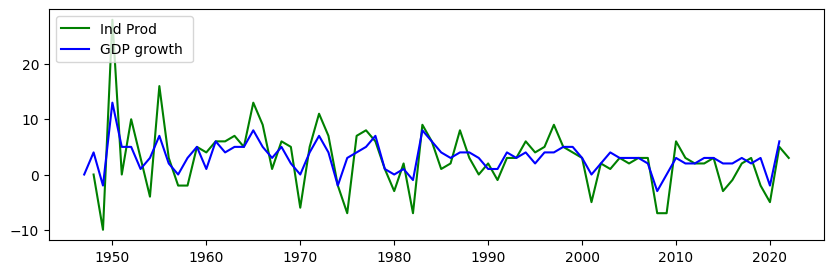

In [407]:
plot_many(2,[[ind_prod_df['year'],ind_prod_df['rate']],
                  [gdp_year_df['year'],gdp_year_df['gdp_growth']]],
                 labels=['Ind Prod','GDP growth '],
                 colors=['green','blue'])

In [408]:
#consumer spending

cons_spend = fred_data.get_series('PCE')

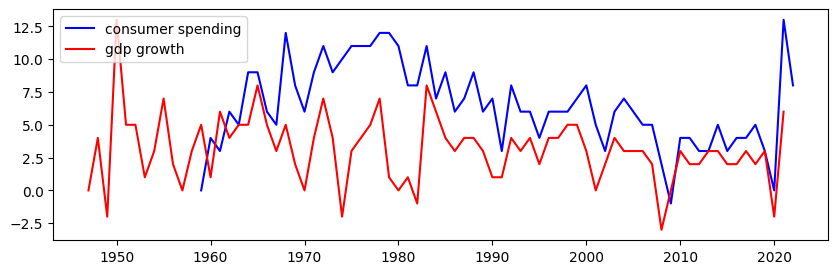

In [409]:
cons_spend_df = series_to_dataframe(cons_spend,column_name='value')
cons_spend_df['rate'] = cons_spend_df['value'].apply(growth_rate, df=cons_spend_df['value'])
plot_many(2,[[cons_spend_df['year'],cons_spend_df['rate']],
             [gdp_year_df['year'],gdp_year_df['gdp_growth']]],labels=['consumer spending','gdp growth'],
             colors=['blue','red'])

In [410]:
cpi = fred_data.get_series('CORESTICKM159SFRBATL')

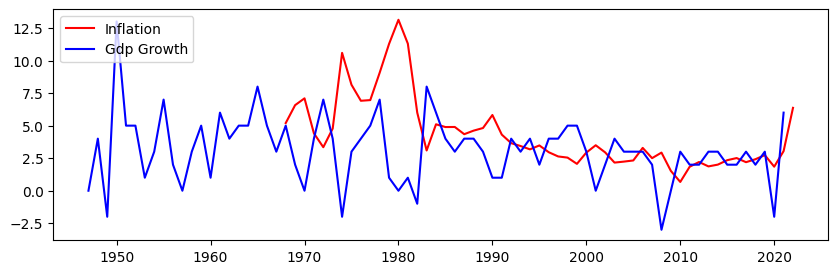

In [417]:
cpi_df = series_to_dataframe(cpi,column_name='rate')
plot_many(2,[[cpi_df['year'],cpi_df['rate']],
             [gdp_year_df['year'],gdp_year_df['gdp_growth']]],
             labels=['Inflation','Gdp Growth'],
             colors=['red','blue'])

In [418]:
house_sales = fred_data.get_series('HSN1F')

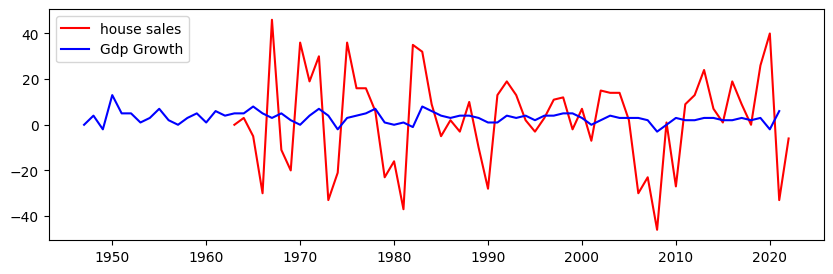

In [424]:
house_sales_df = series_to_dataframe(house_sales,column_name='sales')
house_sales_df['rate'] = house_sales_df['sales'].apply(growth_rate, df=house_sales_df['sales'])

plot_many(2,[[house_sales_df['year'],house_sales_df['rate']],
             [gdp_year_df['year'],gdp_year_df['gdp_growth']]],
             labels=['house sales','Gdp Growth'],
             colors=['red','blue'])

In [526]:

gdp_growth = gdp_year_df.loc[gdp_year_df['year']>=1968].copy()
gdp_growth.drop('gdp',axis=1,inplace=True)
gdp_growth.reset_index(drop=True, inplace=True)

unef_growth = unef_df.loc[unef_df['year']>=1968].copy()
unef_growth.reset_index(drop=True, inplace=True)
unef_growth.rename(columns={'rate':'unrate'},inplace=True)


ind_prod_growth = ind_prod_df.loc[ind_prod_df['year']>=1968].copy()
ind_prod_growth.drop('value',axis=1,inplace=True)
ind_prod_growth.reset_index(drop=True, inplace=True)
ind_prod_growth.rename(columns={'rate':'indprodrate'},inplace=True)

cons_spend_growth = cons_spend_df.loc[cons_spend_df['year']>=1968].copy()
cons_spend_growth.drop('value',axis=1,inplace=True)
cons_spend_growth.reset_index(drop=True, inplace=True)
cons_spend_growth.rename(columns={'rate':'csrate'},inplace=True)

cpi_growth = cpi_df.loc[cpi_df['year']>=1968].copy()
cpi_growth.reset_index(drop=True, inplace=True)
cpi_growth.rename(columns={'rate':'cpi'},inplace=True)

house_sales_growth = house_sales_df.loc[house_sales_df['year']>=1968].copy()
house_sales_growth.drop('sales',axis=1,inplace=True)
house_sales_growth.reset_index(drop=True,inplace=True)
house_sales_growth.rename(columns={'rate':'hsrate'},inplace=True)

In [613]:
final_df = pd.concat([gdp_growth,unef_growth['unrate'],ind_prod_growth['indprodrate'],
                        cpi_growth['cpi'],cons_spend_growth['csrate'],house_sales_growth['hsrate']]
                    ,axis=1)

In [614]:
#scaling down all the rates so that it is easy for us to plot
#Min-Max scaling

def min_max_scaling(value,hsrate=False):
    min_value = -7
    max_value=40
    
    if hsrate:
         x_new = f'{(value - min_value )/(max_value - min_value) : .4f}'
         x_new = float(x_new)

         return (x_new/4)
    else:
        x_new = f'{(value - min_value )/(max_value - min_value) : .4f}'
        return float(x_new)

In [ ]:
max()

In [615]:
final_df['cpi'] = final_df['cpi'].apply(min_max_scaling)
final_df['gdp_growth'] = final_df['gdp_growth'].apply(min_max_scaling)
final_df['unrate'] = final_df['unrate'].apply(min_max_scaling)
final_df['indprodrate'] = final_df['indprodrate'].apply(min_max_scaling)
final_df['csrate'] = final_df['csrate'].apply(min_max_scaling)
final_df['hsrate'] = final_df['hsrate'].apply(min_max_scaling,hsrate=True)

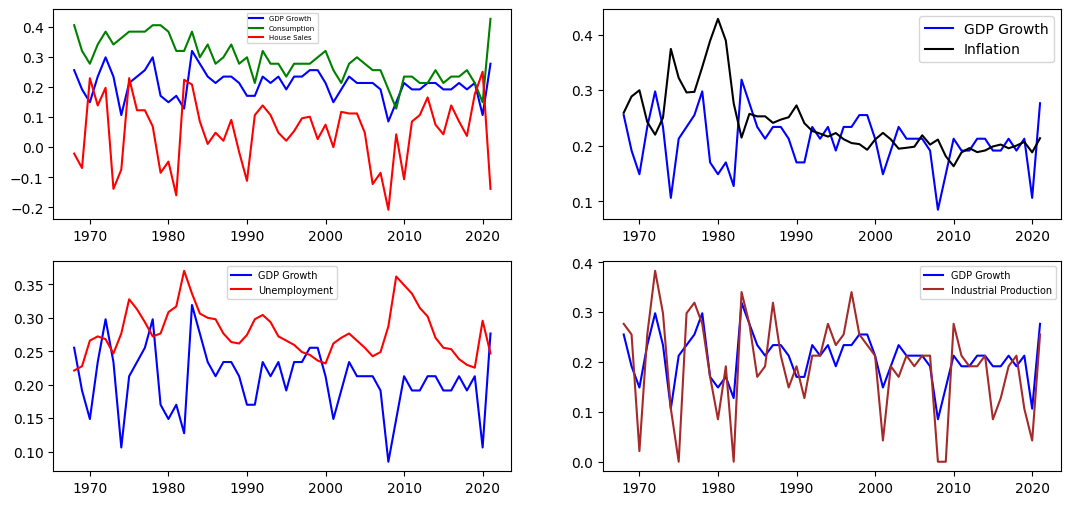

In [633]:
plt.figure(figsize=(13,6))
plt.subplot(221)
plt.plot(final_df['year'],final_df['gdp_growth'],'b',label='GDP Growth')
plt.plot(final_df['year'],final_df['csrate'],'g',label='Consumption')
plt.plot(final_df['year'],final_df['hsrate'],'r',label='House Sales')
plt.legend(loc='upper center',fontsize=5)

plt.subplot(222)
plt.plot(final_df['year'],final_df['gdp_growth'],'b',label='GDP Growth')
plt.plot(final_df['year'],final_df['cpi'],'k',label='Inflation')
plt.legend(loc='upper right')

plt.subplot(223)
plt.plot(final_df['year'],final_df['gdp_growth'],'b',label='GDP Growth')
plt.plot(final_df['year'],final_df['unrate'],'r',label='Unemployment')
plt.legend(loc='upper center',fontsize=7)

plt.subplot(224)
plt.plot(final_df['year'],final_df['gdp_growth'],'b',label='GDP Growth')
plt.plot(final_df['year'],final_df['indprodrate'],'brown',label='Industrial Production')
plt.legend(loc='upper right',fontsize=7)

plt.show()

In [659]:
without_year = final_df.drop('year',axis=1).copy()

In [668]:
without_year.corr()

,gdp_growth,unrate,indprodrate,cpi,csrate,hsrate
gdp_growth,1.000000,-0.195510,0.790371,-0.175945,0.484020,0.199486
unrate,-0.195510,1.000000,-0.256268,0.128197,-0.077488,0.221601
indprodrate,0.790371,-0.256268,1.000000,-0.125894,0.412881,-0.072081
cpi,-0.175945,0.128197,-0.125894,1.000000,0.625099,-0.224302
csrate,0.484020,-0.077488,0.412881,0.625099,1.000000,-0.100187
hsrate,0.199486,0.221601,-0.072081,-0.224302,-0.100187,1.000000


<AxesSubplot: >

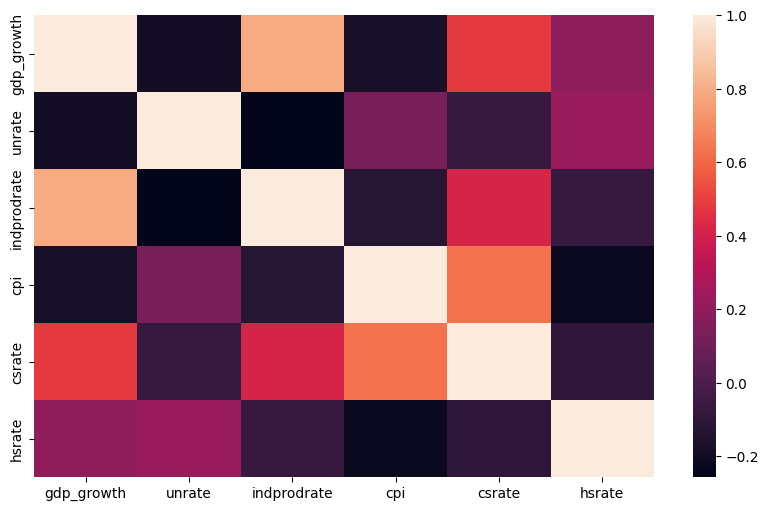

In [667]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(without_year.corr())

#### As we can see from the above viz and correlation matrix, GDP Growth is higly correlated with Industrial Production and somewhat with the consumption. Both Inflation and Unemployment have weak negative correlation, negative correlation is expected from these two metrics but still a weak correlation means they both don't affect each other much (note: the GDP figures are inflation adjusted. i have taken real GDP). also, note that the inflation and industrial metrics are also weakly correlated. Both inflation(cpi)  and csrate are somewhat positively correlated, this is to expected as people would have more money to spend and thus,increase in prices of goods.